# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NYC Brooklyn - Data Processing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame

## 1. Data Cleaning

In [2]:
brook = pd.read_csv('brooklyn_addr2.csv') 

## Drop attributes
- cmplnt_num
- cmplnt_fr_dt
- cmplnt_fr_tm
- crm_atpt_cptd_cd
- boro_nm
- parks_nm
- Number
- City
- State
- Country

In [3]:
attributes_to_drop = ['cmplnt_num', 'cmplnt_fr_dt', 'crm_atpt_cptd_cd', 'cmplnt_fr_tm', 'boro_nm', 
                      'parks_nm','Number', 'City', 'State', 'Country']
df = brook.drop(attributes_to_drop, axis = 1)
df = df.dropna(subset=['Zip'])

In [4]:
df.groupby('Zip').count().index

Index(['10002', '10003', '10011', '10013', '10014', '10018', '10024', '10025',
       '10027', '10029', '10033', '10035', '10314', '10451', '10452', '10454',
       '10457', '10459', '10460', '10461', '10463', '10465', '10466', '10467',
       '10473', '11201', '11201-1832', '11203', '11204', '11205', '11206',
       '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214',
       '11214;11223', '11215', '11216', '11217', '11218', '11219', '11220',
       '11221', '11222', '11223', '11224', '11224-4003', '11225', '11226',
       '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235',
       '11236', '11237', '11238', '11239', '11249', '11361', '11365', '11370',
       '11373', '11375', '11385', '11412', '11414', '11416', '11417', '11421',
       '11428', '11434', '11691'],
      dtype='object', name='Zip')

In [5]:
# Replace zip code 
# 111201-1832 -> 11201
# 11224-4003 -> 11224
df['Zip'].replace('11201-1832', '11201', inplace=True)
df['Zip'].replace('11224-4003', '11224', inplace=True)

# Brooklyn zip 112XX
index_to_remove = [x for x in df.groupby('Zip').count().index if (x < '11200') or (x > '11300') ]
index_to_remove.append('11214;11223')

# Slice dataframe
for zipcode in index_to_remove:
    df = df[df["Zip"] != zipcode]

In [6]:
brooklyn_zip = list(df['Zip'].unique())
brooklyn_zip.sort()
print(brooklyn_zip)

['11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11239', '11249']


In [7]:
len(df['Zip'].unique())

38

## Law category
- "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
- "Misdemeanor" means an offense, other than a "traffic infraction, " for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
- "Violation" means an offense, other than a "traffic infraction", for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.

In [8]:
df['law_cat_cd'].unique()

array(['FELONY', 'MISDEMEANOR', 'VIOLATION'], dtype=object)

## Offense description

### - Rows to remove: ofns description total count < 300

In [9]:
df['ofns_desc'].value_counts()[0:29]

PETIT LARCENY                     114181
HARRASSMENT 2                      98123
ASSAULT 3 & RELATED OFFENSES       70712
CRIMINAL MISCHIEF & RELATED OF     70386
GRAND LARCENY                      52540
FELONY ASSAULT                     30467
OFF. AGNST PUB ORD SENSBLTY &      30128
MISCELLANEOUS PENAL LAW            25928
DANGEROUS DRUGS                    21424
ROBBERY                            20926
BURGLARY                           20209
DANGEROUS WEAPONS                  11945
GRAND LARCENY OF MOTOR VEHICLE     10149
VEHICLE AND TRAFFIC LAWS            9464
SEX CRIMES                          8793
FORGERY                             8554
INTOXICATED & IMPAIRED DRIVING      7450
OFFENSES AGAINST PUBLIC ADMINI      6926
THEFT-FRAUD                         4907
CRIMINAL TRESPASS                   4574
FRAUDS                              3097
UNAUTHORIZED USE OF A VEHICLE       2644
POSSESSION OF STOLEN PROPERTY       2444
RAPE                                2145
OTHER OFFENSES R

In [10]:
index_to_remove = list(df['ofns_desc'].value_counts()[29:].index)
print(index_to_remove)

['NYS LAWS-UNCLASSIFIED FELONY', 'GAMBLING', "BURGLAR'S TOOLS", 'OTHER STATE LAWS (NON PENAL LA', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'KIDNAPPING & RELATED OFFENSES', 'PETIT LARCENY OF MOTOR VEHICLE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'THEFT OF SERVICES', 'PROSTITUTION & RELATED OFFENSES', 'OFFENSES RELATED TO CHILDREN', 'DISORDERLY CONDUCT', 'OFFENSES AGAINST PUBLIC SAFETY', 'ENDAN WELFARE INCOMP', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'OTHER STATE LAWS', 'LOITERING/GAMBLING (CARDS, DIC', 'FRAUDULENT ACCOSTING', 'CHILD ABANDONMENT/NON SUPPORT', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'KIDNAPPING', 'JOSTLING', 'ESCAPE 3', 'NEW YORK CITY HEALTH CODE', 'ANTICIPATORY OFFENSES', 'FELONY SEX CRIMES', 'INTOXICATED/IMPAIRED DRIVING', 'HOMICIDE-NEGLIGENT-VEHICLE', 'OTHER STATE LAWS (NON PENAL LAW)', 'UNLAWFUL POSS. WEAP. ON SCHOOL', 'DISRUPTION OF A RELIGIOUS SERV', 'KIDNAPPING AND RELATED OFFENSES', 'LOITERING']


In [11]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["ofns_desc"] != desc]

In [12]:
len(df["ofns_desc"].value_counts())

29

In [13]:
df.shape

(645551, 21)

## Brooklyn data (brook_df.csv)
- Zip code cleaning
- Offense description cleaning

In [14]:
# Write to a csv file
df.to_csv("df_brook.csv", index = False)

## 2. EDA

## Crime distribution by zip code

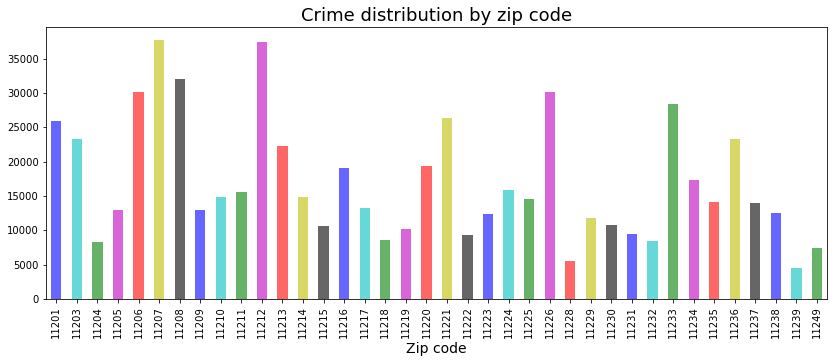

In [15]:
# Zip-code
fig = plt.figure(figsize = (14,5))
_ = df['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Crime distribution by zip code", fontsize=18)
_ = plt.xlabel('Zip code', fontsize = 14)

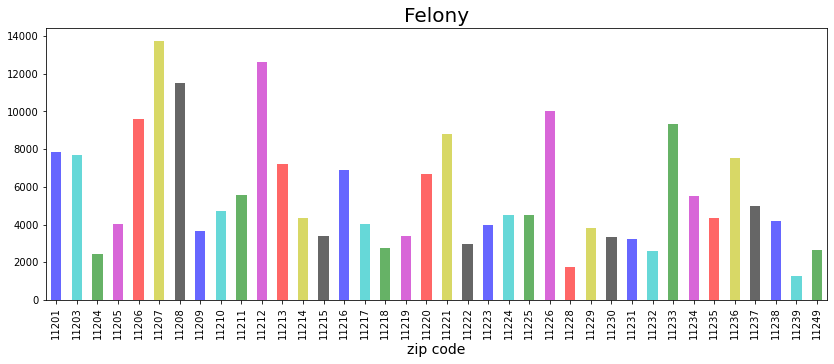

In [16]:
# Felony by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='FELONY']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Felony",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

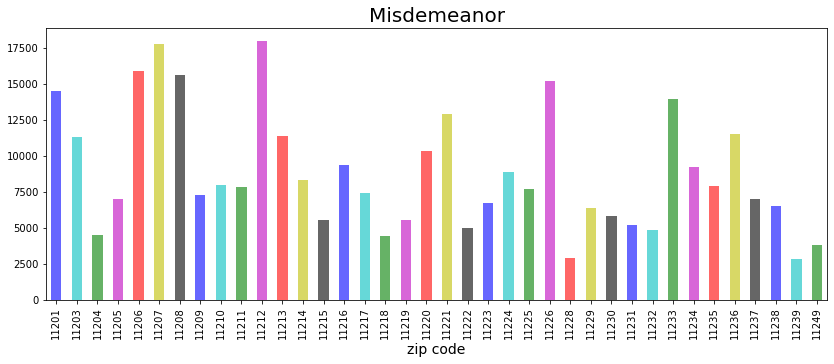

In [17]:
# MISDEMEANOR by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='MISDEMEANOR']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Misdemeanor",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

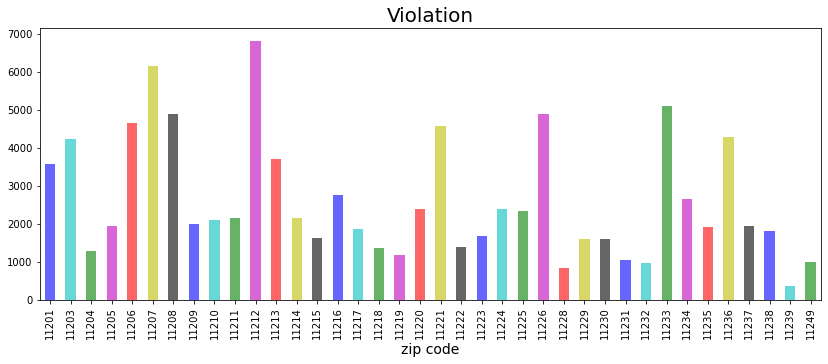

In [18]:
# Violation by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='VIOLATION']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Violation",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

## Make dataframe of "zip"-"law-cat-cd" with averaged lattitude and longitude

- Crosstab Zip & law_cat_cd

In [19]:
ctab_zip_law = pd.crosstab(df['Zip'],df['law_cat_cd'])

# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in brooklyn_zip:    # brooklyn_zip: zip list of Brooklyn
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

df_zip_law = pd.DataFrame(dict(ctab_zip_law))
# Add total crime count for each zip code
df_zip_law['Crime'] = df_zip_law['FELONY']+df_zip_law['MISDEMEANOR']+df_zip_law['VIOLATION']

# Add lattitude and longitude of each zip location to dataframe
df_zip_law['zip'] = df_zip_law.index
df_zip_law = df_zip_law.reset_index(drop=True)
df_zip_law['latitude'] = loc_add['latitude']
df_zip_law['longitude'] = loc_add['longitude']
df_zip_law.head(5)

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,7846,14551,3590,25987,11201,40.693036,-73.986889
1,7685,11308,4242,23235,11203,40.651822,-73.934689
2,2432,4540,1283,8255,11204,40.616540,-73.985299
3,4021,7005,1944,12970,11205,40.693346,-73.964849
4,9581,15920,4663,30164,11206,40.700728,-73.942391


In [20]:
df_zip_law.shape

(38, 7)

In [21]:
# Write to a csv file
df_zip_law.to_csv("df_brook_zip_law.csv", index = False)

## Crime count heatmap

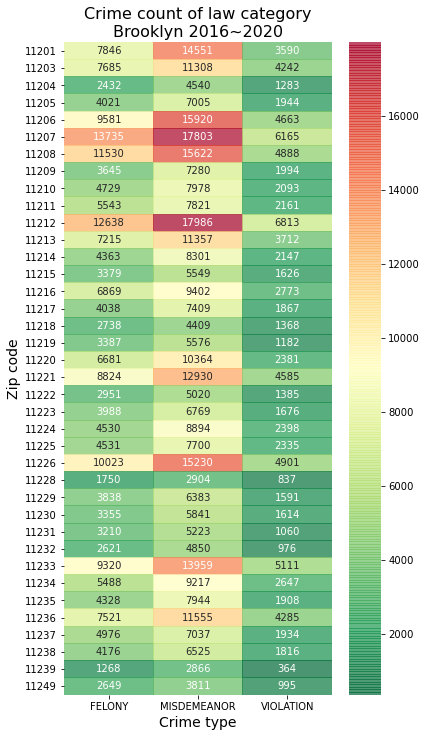

In [22]:
df_select = df_zip_law[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,12))
sns.heatmap(df_select, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count of law category\nBrooklyn 2016~2020', fontsize=16)
plt.show()

## Convert frequency to relative percentage of each law category

In [23]:
df_zip_law_pct = df_zip_law.copy()
df_zip_law_pct = df_zip_law_pct.drop('Crime', axis = 1)
df_zip_law_pct['FELONY'] = df_zip_law['FELONY']/df_zip_law['FELONY'].sum()*100
df_zip_law_pct['MISDEMEANOR'] = df_zip_law['MISDEMEANOR']/df_zip_law['MISDEMEANOR'].sum()*100
df_zip_law_pct['VIOLATION'] = df_zip_law['VIOLATION']/df_zip_law['VIOLATION'].sum()*100
df_zip_law_pct['Crime'] = df_zip_law['Crime']/df_zip_law['Crime'].sum()*100
df_zip_law_pct.head(5)

,FELONY,MISDEMEANOR,VIOLATION,zip,latitude,longitude,Crime
0,3.711412,4.345671,3.614943,11201,40.693036,-73.986889,4.025553
1,3.635254,3.377145,4.271473,11203,40.651822,-73.934689,3.599251
2,1.150415,1.355876,1.291914,11204,40.616540,-73.985299,1.278753
3,1.902063,2.092050,1.957507,11205,40.693346,-73.964849,2.009136
4,4.532124,4.754524,4.695398,11206,40.700728,-73.942391,4.672598


In [24]:
# Write to a csv file
df_zip_law_pct.to_csv("df_brook_zip_law_pct.csv", index = False)

## Crime ratio heatmap

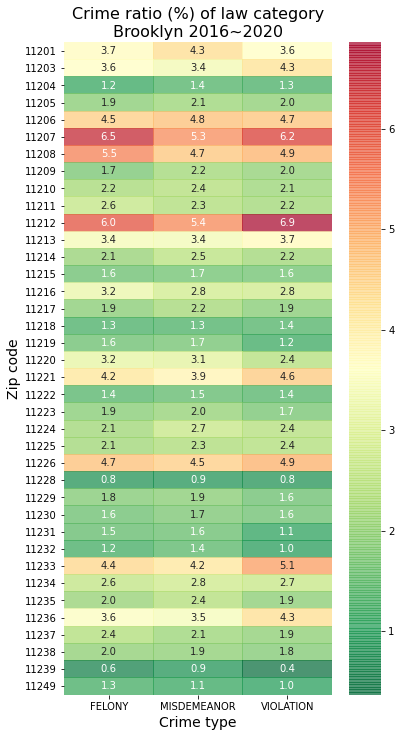

In [25]:
df_select = df_zip_law_pct[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,12))
sns.heatmap(df_select, annot=True, fmt='.1f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) of law category\nBrooklyn 2016~2020', fontsize=16)
plt.show()

In [26]:
df.describe()

,latitude,longitude,YEAR,DAY,MONTH,HOUR
count,645551.000000,645551.000000,645551.000000,645551.000000,645551.000000,645551.000000
mean,40.659246,-73.946817,2017.920140,15.540645,6.547546,13.122728
std,0.034717,0.038226,1.398341,8.859359,3.391856,6.632402
min,40.571859,-74.040795,2016.000000,1.000000,1.000000,0.000000
25%,40.637689,-73.975104,2017.000000,8.000000,4.000000,9.000000
50%,40.665544,-73.946945,2018.000000,15.000000,7.000000,14.000000
75%,40.684382,-73.920268,2019.000000,23.000000,9.000000,18.000000
max,40.738863,-73.855903,2020.000000,31.000000,12.000000,23.000000


## Test map location

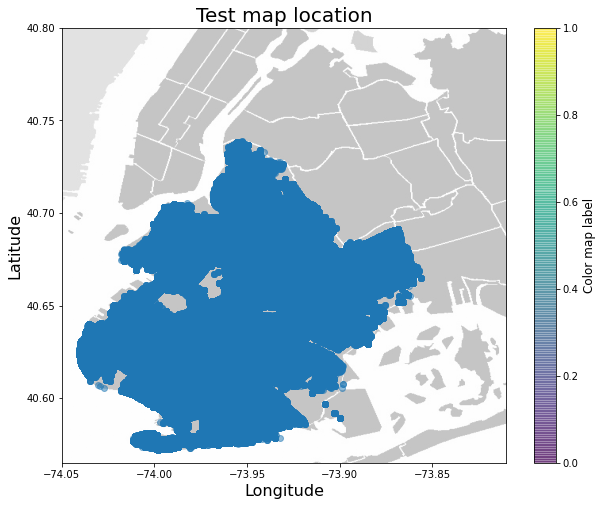

In [27]:
def plot_test(data_file):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(data_file["longitude"],data_file["latitude"],                
                alpha = 0.5, marker='o')
    plt.title("Test map location", fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_Brooklyn.png")
    plt.imshow(ny_img, extent=[-74.05, -73.81, 40.565, 40.80], alpha=0.4)
    cbar.set_label("Color map label", fontsize=12)
    plt.show()    
    
plot_test(df)

## Crime heatmap on the map

In [28]:
# plot_heatmap(category, data_file)
# prameter
#  category (string): crime category to plot 
#  data_file (dataframe): data to plot 
#     percentage distribution otherwise change colorbar label
def plot_heatmap(category, data_file):
    fig = plt.figure(figsize=(8,10))
    plt.scatter(data_file["longitude"],data_file["latitude"], 
                alpha = 0.8, s=100*data_file[category], marker='o',
                c= data_file[category], cmap='RdYlGn_r')
    title_string = category + ' (Brooklyn)'
    plt.title(title_string, fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_Brooklyn.png")
    plt.imshow(ny_img, extent=[-74.05, -73.81, 40.565, 40.80], alpha=0.4)
    cbar.set_label("Percentage distribution in Zip code area", fontsize=12)
    plt.show()    

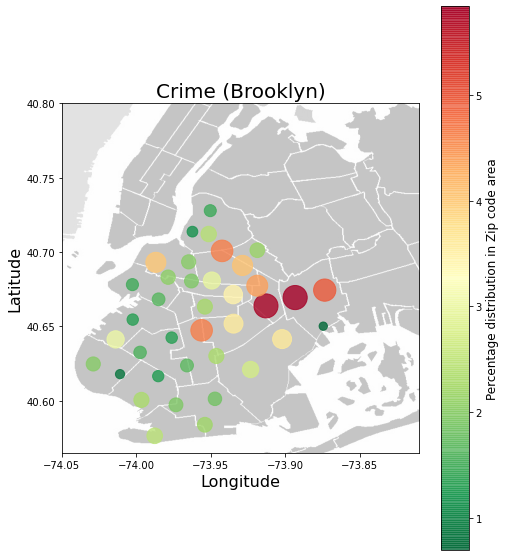

In [29]:
caterory = "Crime"
plot_heatmap(caterory, df_zip_law_pct)

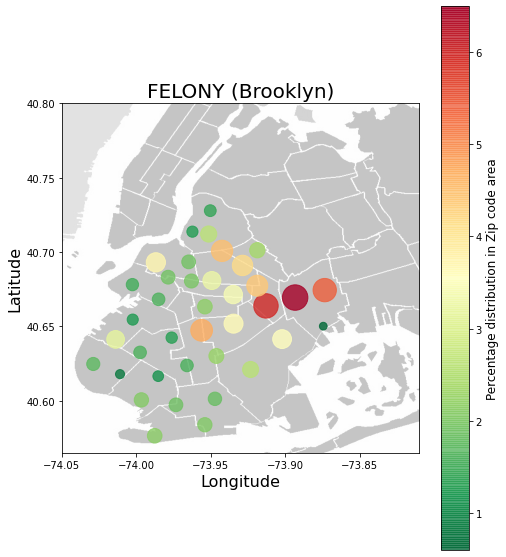

In [30]:
caterory = "FELONY"
plot_heatmap(caterory, df_zip_law_pct)

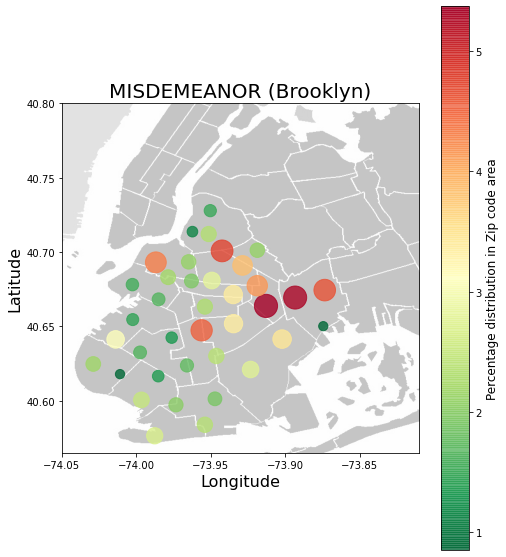

In [31]:
caterory = "MISDEMEANOR"
plot_heatmap(caterory, df_zip_law_pct)

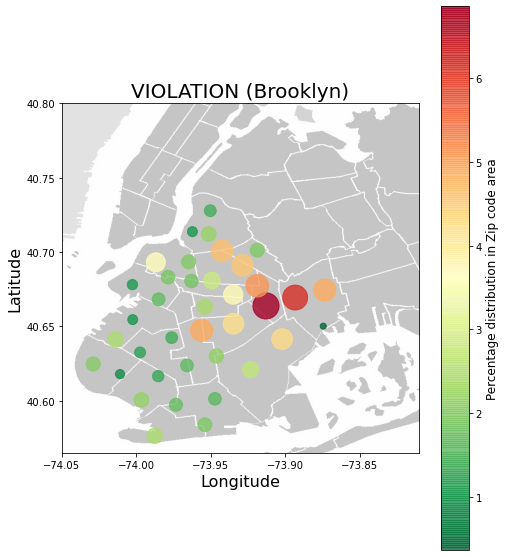

In [32]:
caterory = "VIOLATION"
plot_heatmap(caterory, df_zip_law_pct)

# Crosstab of Offense description and Zip code

In [33]:
# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in brooklyn_zip:    # brooklyn_zip: zip list of Brooklyn
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

In [34]:
ctab_zip_ofns_desc = pd.crosstab(df['Zip'],df['ofns_desc'])

# Add lattitude and longitude of each zip location to dataframe
df_zip_ofns = pd.DataFrame(dict(ctab_zip_ofns_desc))
df_zip_ofns['zip'] = df_zip_ofns.index
df_zip_ofns = df_zip_ofns.reset_index(drop=True)
df_zip_ofns['latitude'] = loc_add['latitude']
df_zip_ofns['longitude'] = loc_add['longitude']
df_zip_ofns.head(5)

,ADMINISTRATIVE CODE,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,13,20,2387,597,2219,155,576,312,943,427,...,99,28,666,278,240,95,279,11201,40.693036,-73.986889
1,117,35,2871,519,2768,133,466,499,1560,669,...,77,0,694,0,101,82,448,11203,40.651822,-73.934689
2,28,10,812,302,974,44,179,54,238,33,...,14,0,213,0,86,36,127,11204,40.616540,-73.985299
3,25,24,1353,494,1616,131,423,173,595,89,...,35,57,388,209,101,29,236,11205,40.693346,-73.964849
4,52,59,3325,1012,3541,230,1367,617,1447,286,...,107,0,1077,0,174,75,378,11206,40.700728,-73.942391


In [35]:
df_zip_ofns.shape

(38, 32)

In [36]:
# Write to a csv file
df_zip_ofns.to_csv("df_brook_zip_ofns.csv", index = False)

## Convert frequency to relative percentage of each offense description

In [37]:
col_names = list(df_zip_ofns.keys())
print(col_names)

['ADMINISTRATIVE CODE', 'ARSON', 'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON', 'OFFENSES INVOLVING FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'RAPE', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS', 'zip', 'latitude', 'longitude']


In [38]:
df_zip_ofns_pct = df_zip_ofns.copy()
for index in col_names[:-3]:
    column = df_zip_ofns_pct[index]
    df_zip_ofns_pct[index] = column/column.sum()*100
df_zip_ofns_pct.head(5)

,ADMINISTRATIVE CODE,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,0.821745,1.902950,3.375665,2.954129,3.152616,3.388719,2.688574,2.611972,3.095152,4.991817,...,4.050736,1.305361,3.182644,3.161606,4.890972,3.593041,2.948014,11201,40.693036,-73.986889
1,7.395702,3.330162,4.060131,2.568163,3.932600,2.907739,2.175131,4.177480,5.120294,7.820903,...,3.150573,0.000000,3.316448,0.000000,2.058284,3.101362,4.733728,11203,40.651822,-73.934689
2,1.769912,0.951475,1.148320,1.494384,1.383798,0.961959,0.835512,0.452072,0.781173,0.385784,...,0.572831,0.000000,1.017873,0.000000,1.752598,1.361573,1.341927,11204,40.616540,-73.985299
3,1.580278,2.283539,1.913395,2.444455,2.295911,2.864014,1.974421,1.448305,1.952933,1.040449,...,1.432079,2.657343,1.854153,2.376891,2.058284,1.096823,2.493660,11205,40.693346,-73.964849
4,3.286979,5.613701,4.702172,5.007670,5.030830,5.028422,6.380695,5.165341,4.749401,3.343465,...,4.378069,0.000000,5.146707,0.000000,3.545955,2.836611,3.994083,11206,40.700728,-73.942391


In [39]:
df_zip_ofns_pct.shape

(38, 32)

In [40]:
# Write to a csv file
df_zip_ofns_pct.to_csv("df_brook_zip_ofns_pct.csv", index = False)

In [41]:
col_names[-3]

'zip'

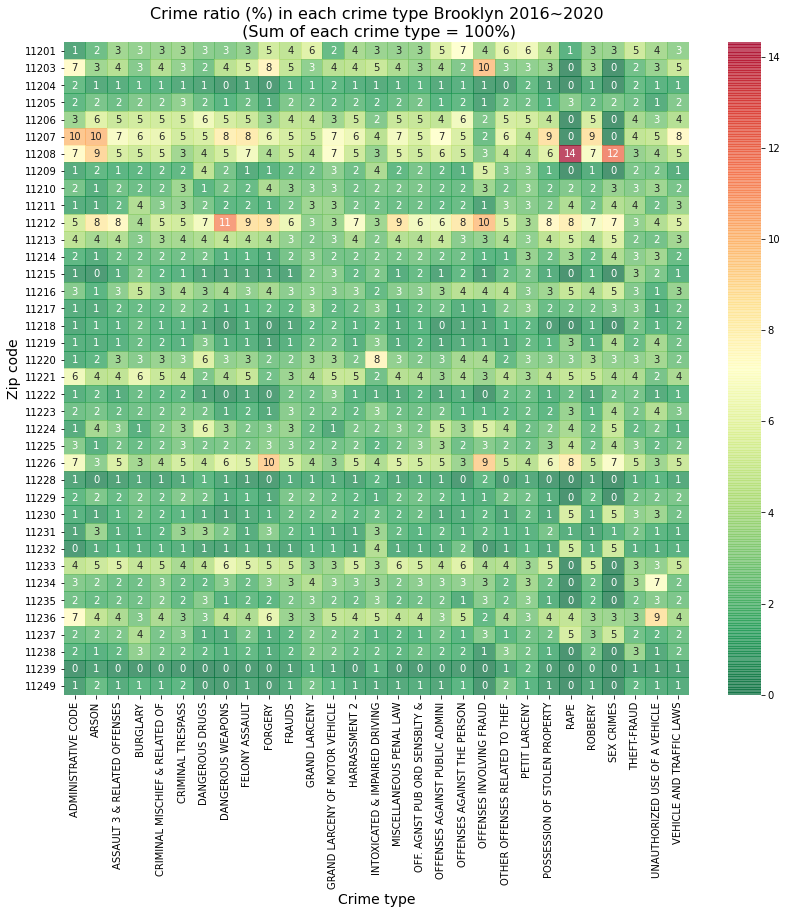

In [42]:
df2_plot = df_zip_ofns_pct[[x for x in col_names[0:-2]]]
df2_plot = df2_plot.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(14,12))
sns.heatmap(df2_plot, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) in each crime type Brooklyn 2016~2020\n (Sum of each crime type = 100%)', fontsize=16)
plt.show()

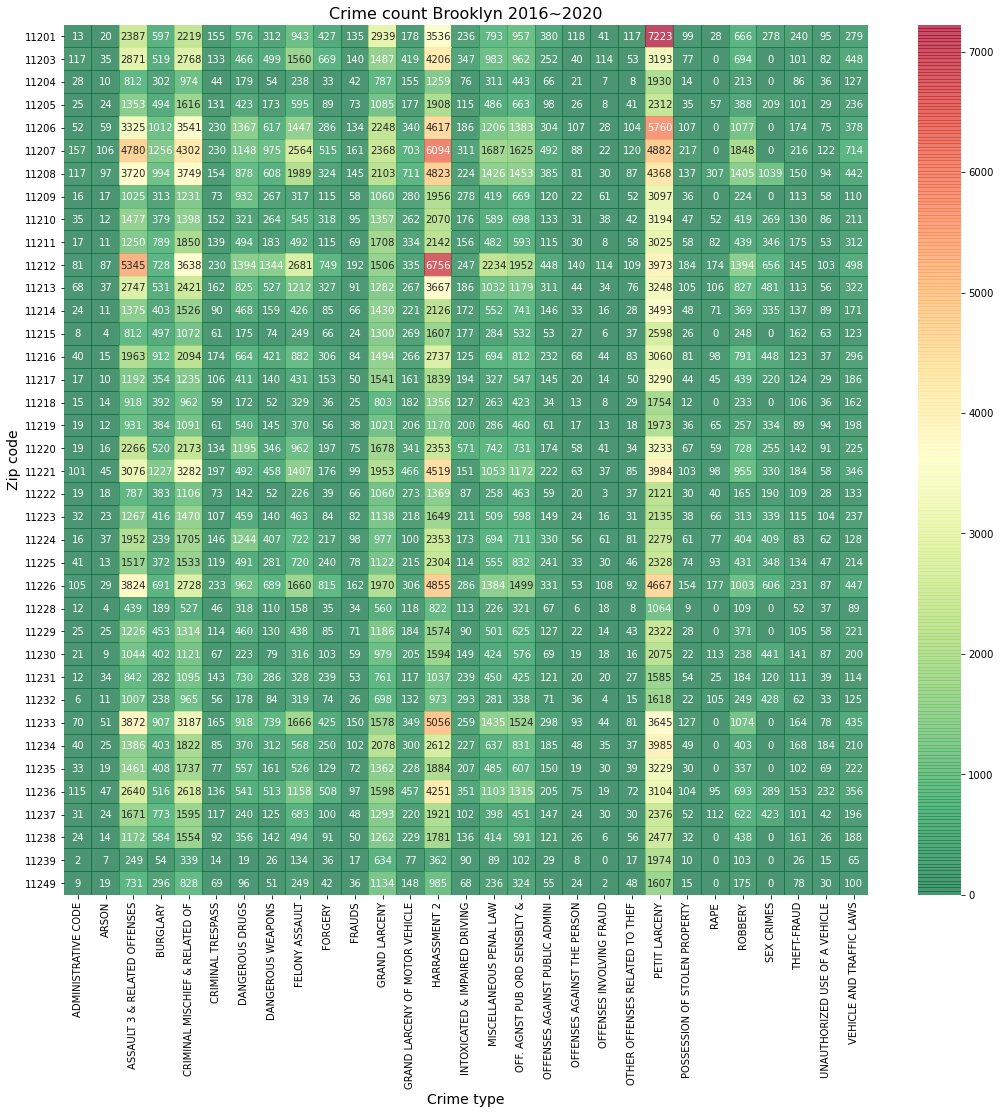

In [43]:
df2_plot2 = df_zip_ofns[[x for x in col_names[0:-2]]]
df2_plot2 = df2_plot2.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(18,16))
sns.heatmap(df2_plot2, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count Brooklyn 2016~2020', fontsize=16)
plt.show()

# Plot by crime type

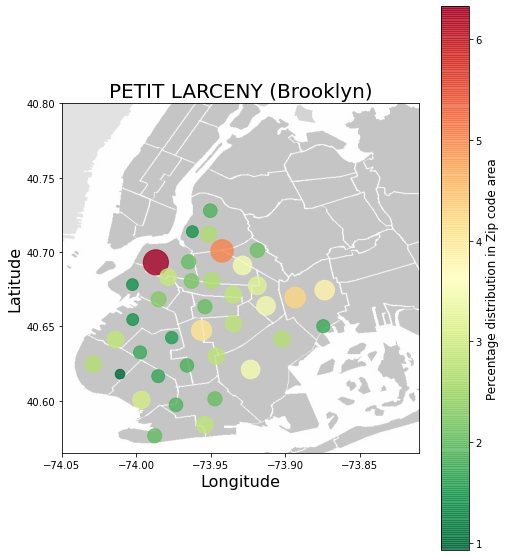

In [44]:
caterory = "PETIT LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

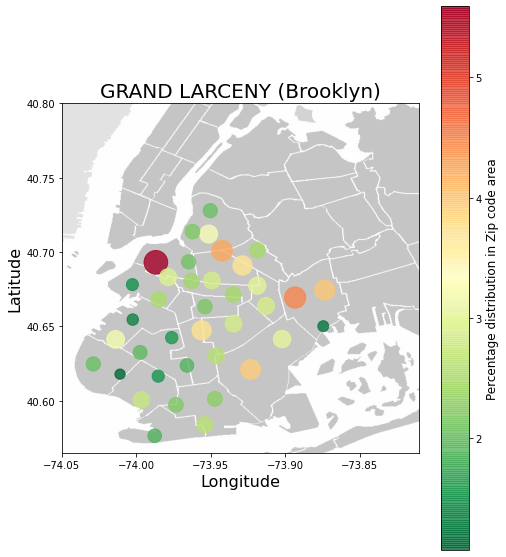

In [45]:
caterory = "GRAND LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

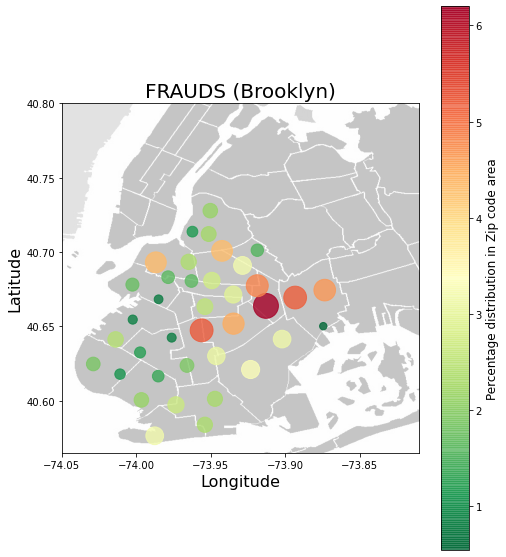

In [46]:
caterory = "FRAUDS"
plot_heatmap(caterory, df_zip_ofns_pct)

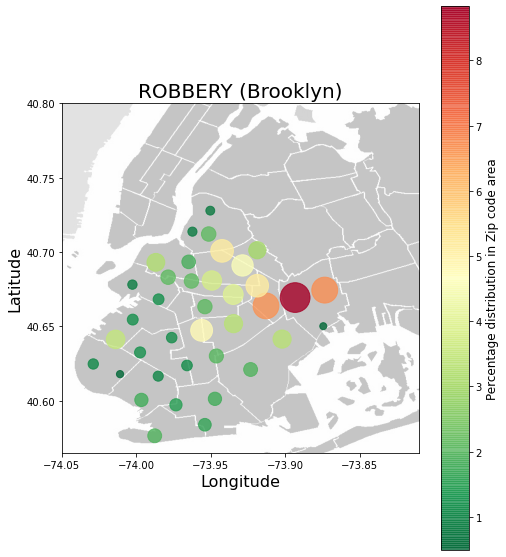

In [47]:
caterory = "ROBBERY"
plot_heatmap(caterory, df_zip_ofns_pct)

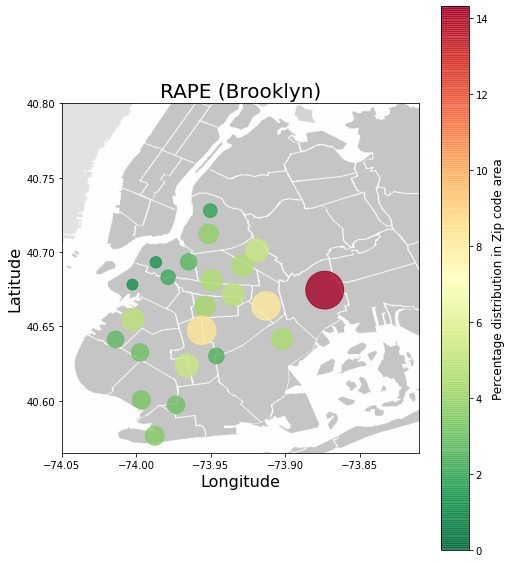

In [48]:
caterory = "RAPE"
plot_heatmap(caterory, df_zip_ofns_pct)

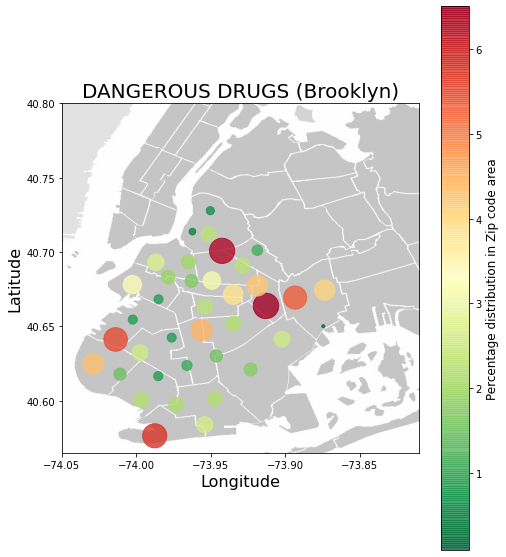

In [49]:
caterory = "DANGEROUS DRUGS"
plot_heatmap(caterory, df_zip_ofns_pct)